In [1]:
sentence="The Eiffel Tower was built from 1887 to 1889 by Gustave Eiffel, whose company specialized in building metal frameworks and structures."


In [2]:
import nltk
words = nltk.word_tokenize(sentence)

In [3]:
tag_elements=nltk.pos_tag(words)

In [4]:
nltk.download('maxent_ne_chunker_tab')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/gaurav/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [5]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/gaurav/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
nltk.ne_chunk(tag_elements)

ModuleNotFoundError: No module named 'svgling'

Tree('S', [('The', 'DT'), Tree('ORGANIZATION', [('Eiffel', 'NNP'), ('Tower', 'NNP')]), ('was', 'VBD'), ('built', 'VBN'), ('from', 'IN'), ('1887', 'CD'), ('to', 'TO'), ('1889', 'CD'), ('by', 'IN'), Tree('PERSON', [('Gustave', 'NNP'), ('Eiffel', 'NNP')]), (',', ','), ('whose', 'WP$'), ('company', 'NN'), ('specialized', 'VBD'), ('in', 'IN'), ('building', 'NN'), ('metal', 'NN'), ('frameworks', 'NNS'), ('and', 'CC'), ('structures', 'NNS'), ('.', '.')])

In [7]:
!pip3 install networkx matplotlib pydot

In [8]:
import networkx
import matplotlib
import pydot

print("All good!")


All good!


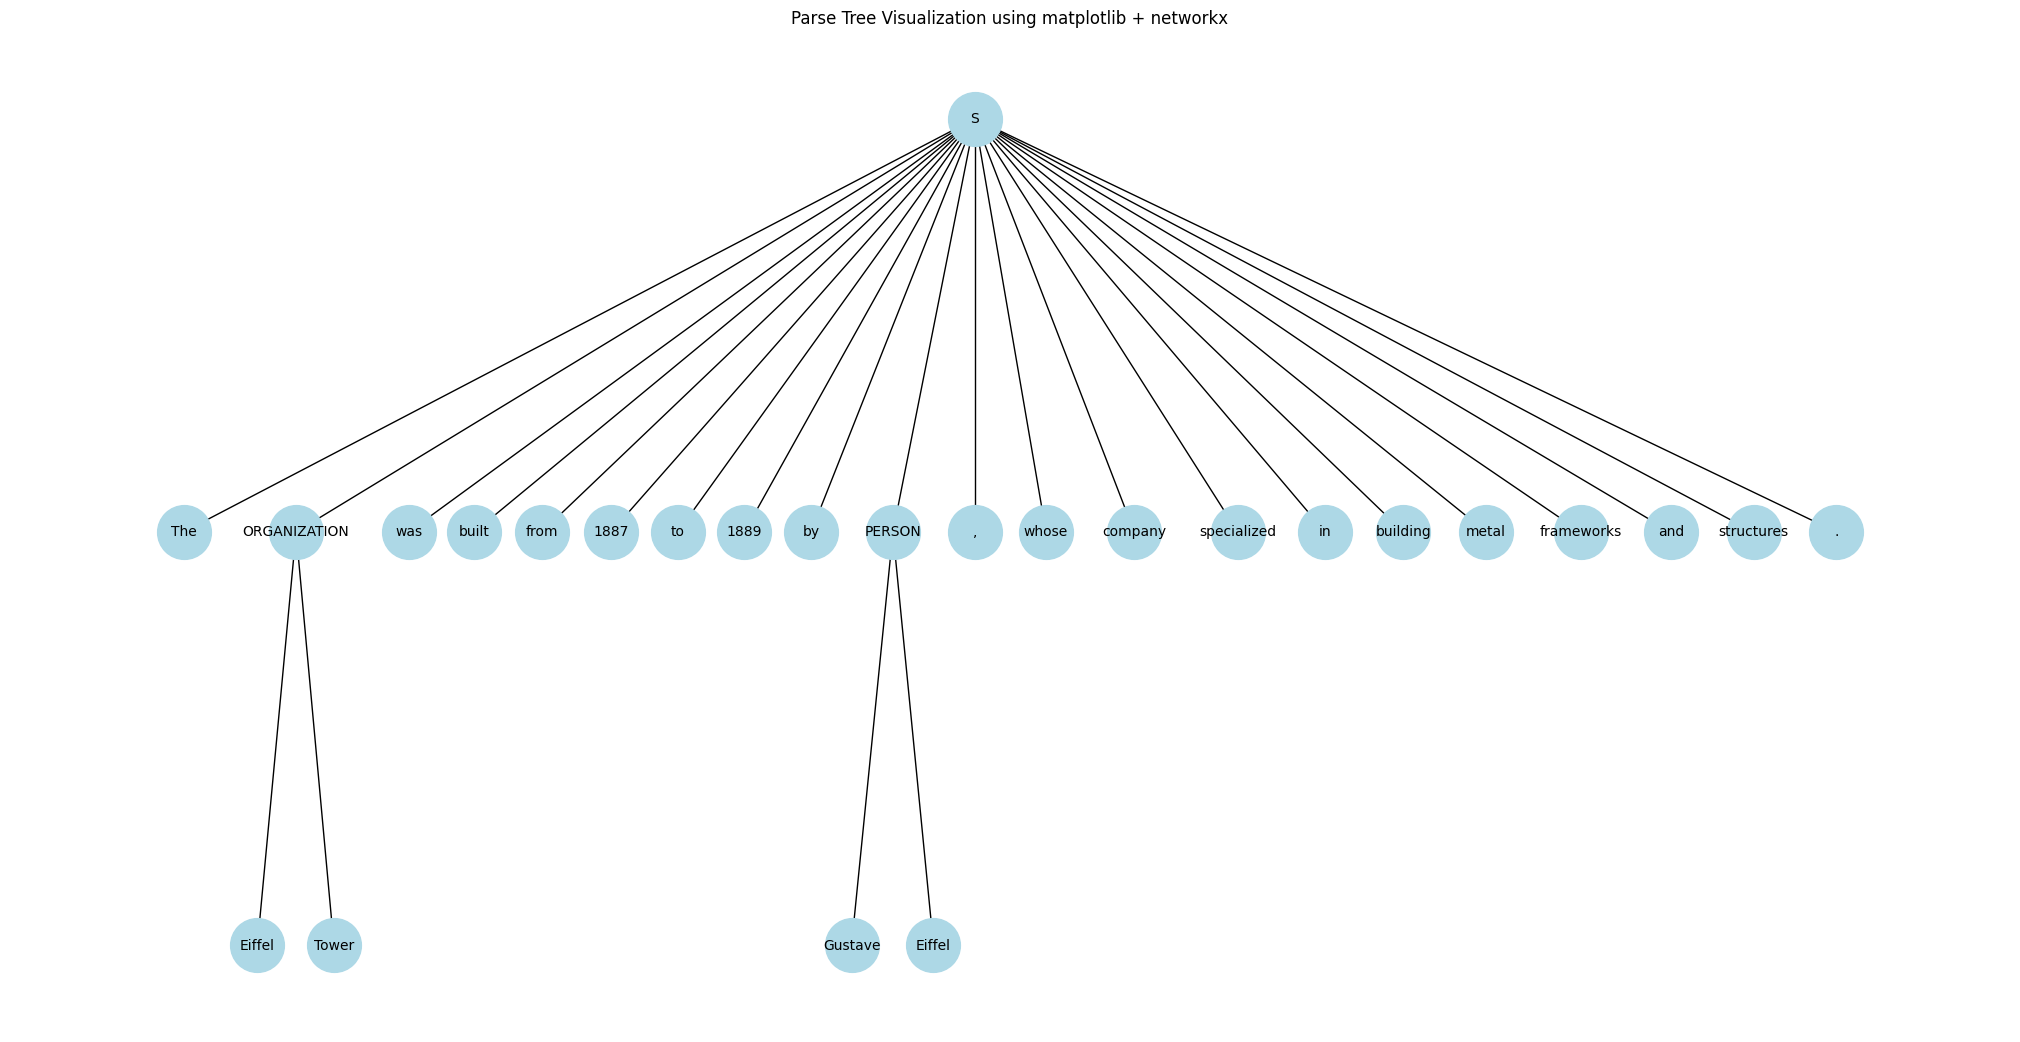

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from nltk import Tree

# Define your tree
tree = Tree('S', [
    ('The', 'DT'),
    Tree('ORGANIZATION', [('Eiffel', 'NNP'), ('Tower', 'NNP')]),
    ('was', 'VBD'),
    ('built', 'VBN'),
    ('from', 'IN'),
    ('1887', 'CD'),
    ('to', 'TO'),
    ('1889', 'CD'),
    ('by', 'IN'),
    Tree('PERSON', [('Gustave', 'NNP'), ('Eiffel', 'NNP')]),
    (',', ','),
    ('whose', 'WP$'),
    ('company', 'NN'),
    ('specialized', 'VBD'),
    ('in', 'IN'),
    ('building', 'NN'),
    ('metal', 'NN'),
    ('frameworks', 'NNS'),
    ('and', 'CC'),
    ('structures', 'NNS'),
    ('.', '.')
])

# Helper to walk tree and add edges
def add_edges(tree, graph, parent=None, node_id=[0]):
    my_id = node_id[0]
    node_label = tree.label() if isinstance(tree, Tree) else tree[0]
    graph.add_node(my_id, label=node_label)
    if parent is not None:
        graph.add_edge(parent, my_id)
    parent_id = my_id
    node_id[0] += 1

    if isinstance(tree, Tree):
        for child in tree:
            add_edges(child, graph, parent_id, node_id)

# Convert tree to graph
G = nx.DiGraph()
add_edges(tree, G)

# Position nodes using hierarchy layout
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')

# Draw nodes and edges
labels = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(20, 10))
nx.draw(G, pos, with_labels=True, labels=labels, arrows=False, node_size=1500, node_color='lightblue', font_size=10)
plt.title("Parse Tree Visualization using matplotlib + networkx")
plt.show()
